In [1]:
#Import packages
import pickle
import pandas as pd
import numpy as np
import math
from math import isnan
import seaborn as sns
import statistics
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt

In [2]:
#Download data which was saved by the scraping progress
with open('df_final.pkl', 'rb') as f:
    df = pickle.load(f)

In [7]:
#Calculate gpa when only passed exams are counted
snit = []
for i in range(0,len(df)):
    x_02 = df[2][i]
    x_04 = df[4][i]
    x_07 = df[7][i]
    x_10 = df[10][i]
    x_12 = df[12][i]
    
    number = (x_12,x_10,x_07,x_04,x_02)
    grades = [12,10,7,4,2]
    mydick = dict(zip(grades,number))
    cleandick = {k: mydick[k] for k in mydick if not isnan(mydick[k])}
    
    num = sum([x * y for x,y in mydick.items()])
    den = sum(mydick.values())
    
    snit.append(num/den)
    
df["Snit"] = snit

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars


In [8]:
#Print different falculties and the results from each
faculties = []
for i in range(0,len(df["Fakultet"].unique())):
    faculties.append(df["Fakultet"].unique()[i])
faculties_results = []
for i in range(0,len(faculties)):
    faculties_results.append(gpa_ordi_reta_faculty(df,faculties[i]))


In [15]:
#print names of different faculties
for i in range(0,len(faculties)):
    print(faculties[i])
faculties_results[0]

Det Natur- og Biovidenskabelige Fakultet
Det Samfundsvidenskabelige Fakultet
Det Humanistiske Fakultet
Det Sundhedsvidenskabelige Fakultet
Det Juridiske Fakultet
Det Teologiske Fakultet


(8.36666414826762, 5.619267850422511)

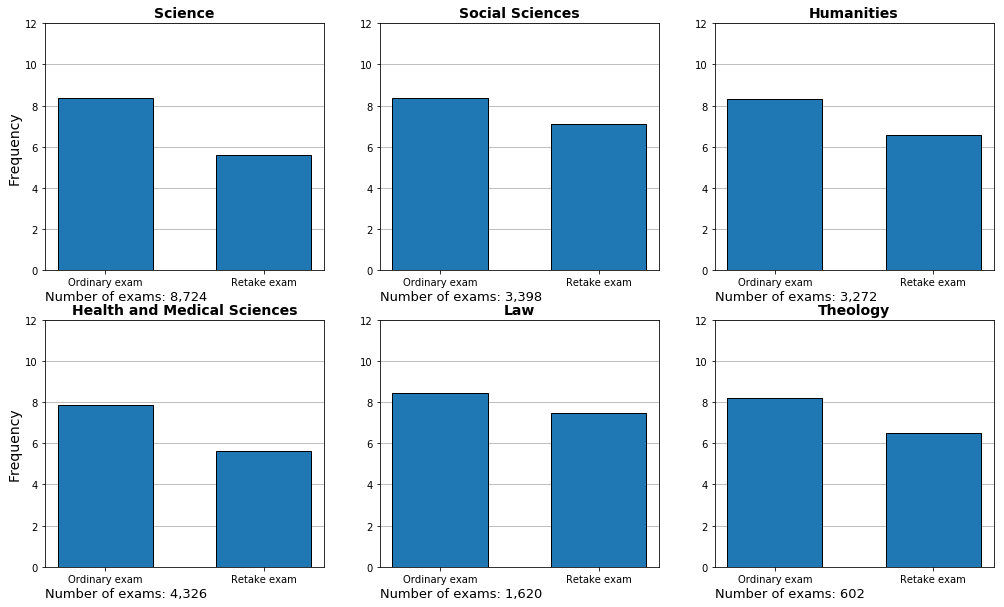

In [9]:
#Plot resulst
x = ["Ordinary exam", "Retake exam"]
y = ["Science", "Social Sciences","Humanities",\
     "Health and Medical Sciences","Law","Theology"]


f,ax = plt.subplots(figsize=(17,10))

plt.subplot(2,3,1)
plt.title(y[0], fontsize = 14, weight = 'bold')
plt.ylim([0,12])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, faculties_results[0], width=0.6, edgecolor='black',zorder=3)
plt.annotate('Number of exams: '+ "8,724", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.subplot(2,3,2)
plt.title(y[1], fontsize = 14, weight = 'bold')
plt.ylim([0,12])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, faculties_results[1], width=0.6, edgecolor='black',zorder=3)
plt.annotate('Number of exams: '+ "3,398", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.subplot(2,3,3)
plt.title(y[2], fontsize = 14, weight = 'bold')
plt.ylim([0,12])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, faculties_results[2], width=0.6, edgecolor='black',zorder=3)
plt.annotate('Number of exams: '+ "3,272", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.subplot(2,3,4)
plt.title(y[3], fontsize = 14, weight = 'bold')
plt.ylim([0,12])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, faculties_results[3], width=0.6, edgecolor='black',zorder=3)
plt.annotate('Number of exams: '+ "4,326", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.subplot(2,3,5)
plt.title(y[4], fontsize = 14, weight = 'bold')
plt.ylim([0,12])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, faculties_results[4], width=0.6, edgecolor='black',zorder=3)
plt.annotate('Number of exams: '+ "1,620", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.subplot(2,3,6)
plt.title(y[5], fontsize = 14, weight = 'bold')
plt.ylim([0,12])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, faculties_results[5], width=0.6, edgecolor='black',zorder=3)
plt.annotate('Number of exams: '+ "602", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('ordinary_vs_retake.png')

In [13]:
# This function computes the gpa of ordinary and retake exams for some fakulty.
# Output is a 2D vector where the first coordinate is the ordinary gpa and the
# second coordinate is the retake gpa.
def gpa_ordi_reta_faculty(df,string):
    ordi = []
    reta = []
    ordi_number = []
    reta_number = []
    
    for i in range(0,len(df)):
        if df["Fakultet"][i] == string:
            ects = int(df["Credit_edit"][i]*10)
            for j in range(0,ects):
                if df["Eksamenstype"][i] == "Ordinær eksamen":
                    ordi.append(df["Snit"][i])
                if df["Eksamenstype"][i] == "Reeksamen":
                    reta.append(df["Snit"][i])
            if df["Eksamenstype"][i] == "Ordinær eksamen":
                ordi_number.append(1)
            if df["Eksamenstype"][i] == "Reeksamen":
                reta_number.append(-1)
                
    ordi_number = [x for x in ordi_number if (math.isnan(x) == False)]
    reta_number = [x for x in reta_number if (math.isnan(x) == False)]
    
    ordi = [x for x in ordi if (math.isnan(x) == False)]
    ordi_old = ordi
    
    reta = [x for x in reta if (math.isnan(x) == False)]
    reta_old = reta
    
    
    ordi = sum(ordi)/len(ordi)
    reta = sum(reta)/len(reta)
    return ordi,reta#,ordi_number,reta_number#, ordi_old, reta_old

def gpa_ordi_reta_faculty_test(df,string):
    ordi = []
    reta = []
    for i in range(0,len(df)):
        if df["Fakultet"][i] == string:
            ects = int(df["Credit_edit"][i]*10)
            for j in range(0,ects):
                if df["Eksamenstype"][i] == "Ordinær eksamen":
                    ordi.append(df["Snit"][i])
                if df["Eksamenstype"][i] == "Reeksamen":
                    reta.append(df["Snit"][i])

    ordi = [x for x in ordi if (math.isnan(x) == False)]
    
    reta = [x for x in reta if (math.isnan(x) == False)]
    
    
    ordi_res = sum(ordi)/len(ordi)
    reta_res = sum(reta)/len(reta)
    return ordi_res,reta_res, ordi, reta

In [14]:
#import random
#from scipy import stats
#from tqdm import tqdm_notebook


#hh = gpa_ordi_reta_faculty_test(df,"Det Juridiske Fakultet")
#ordi = np.array(hh[2])
#reta = np.array(hh[3])

#if ordi.size >= reta.size:
#    mindst = reta.size
#if ordi.size < reta.size:
#    mindst = ordi.size


#ite = 1000
#vec = []
#for i in tqdm_notebook(range(0,ite)):
#    ordi_new = np.asarray(np.random.choice(ordi,int(0.95*mindst),replace=False))
#    reta_new = np.asarray(np.random.choice(reta,int(0.95*mindst),replace=False))
    
#    vec.append(stats.ttest_ind(ordi_new,reta_new,equal_var=False)[1])
#print("p-value: ",100*np.mean(vec))
#np.mean(vec)
#Det Natur- og Biovidenskabelige Fakultet
#Det Samfundsvidenskabelige Fakultet
#Det Humanistiske Fakultet
#Det Sundhedsvidenskabelige Fakultet
#Det Juridiske Fakultet
#Det Teologiske Fakultet
